In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [3]:
# Credit Card Default Dataset
# Note: I skip the first row because the original file has a repeated header
credit_df = pd.read_csv("default of credit card clients.csv", skiprows=1)

In [4]:
# Print shape/head
print("\nCredit Default Dataset:")
print(credit_df.shape)
print(credit_df.head())


Credit Default Dataset:
(30000, 25)
   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment 

In [15]:
# Clean column names
credit_df.columns = credit_df.columns.str.strip().str.replace(" ", "_").str.lower()

# Rename target column
credit_df.rename(columns={'default_payment_next_month': 'target'}, inplace=True)

# Check missing values
print("Missing values per column:\n", credit_df.isnull().sum())

# Separate features and target
X_credit = credit_df.drop(columns=['id', 'target'], errors='ignore')  
y_credit = credit_df['target']

# Train/test split BEFORE scaling
X_credit_train, X_credit_test, y_credit_train, y_credit_test = train_test_split(
    X_credit, y_credit, test_size=0.2, random_state=42, stratify=y_credit
)

# Scale ONLY on training set
scaler = StandardScaler()
X_credit_train_scaled = scaler.fit_transform(X_credit_train)  
X_credit_test_scaled = scaler.transform(X_credit_test)        

# Confirm shape
print(y_credit.value_counts())
print("Train shape:", X_credit_train_scaled.shape)
print("Test shape:", X_credit_test_scaled.shape)


Missing values per column:
 id           0
limit_bal    0
sex          0
education    0
marriage     0
age          0
pay_0        0
pay_2        0
pay_3        0
pay_4        0
pay_5        0
pay_6        0
bill_amt1    0
bill_amt2    0
bill_amt3    0
bill_amt4    0
bill_amt5    0
bill_amt6    0
pay_amt1     0
pay_amt2     0
pay_amt3     0
pay_amt4     0
pay_amt5     0
pay_amt6     0
target       0
dtype: int64
target
0    23364
1     6636
Name: count, dtype: int64
Train shape: (24000, 23)
Test shape: (6000, 23)


In [6]:
# Initialise and train model
model_lr_credit = LogisticRegression(max_iter=1000, random_state=42)
model_lr_credit.fit(X_credit_train_scaled, y_credit_train)

# Predict on test set
y_pred_lr_credit = model_lr_credit.predict(X_credit_test_scaled)
y_prob_lr_credit = model_lr_credit.predict_proba(X_credit_test_scaled)[:, 1]  

# Evaluate
print("Logistic Regression - Credit Dataset:\n")
print(classification_report(y_credit_test, y_pred_lr_credit))

Logistic Regression - Credit Dataset:

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.69      0.24      0.36      1327

    accuracy                           0.81      6000
   macro avg       0.75      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000



In [7]:
# Initialise and train model
model_rf_credit = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf_credit.fit(X_credit_train_scaled, y_credit_train)

# Predict
y_pred_rf_credit = model_rf_credit.predict(X_credit_test_scaled)
y_prob_rf_credit = model_rf_credit.predict_proba(X_credit_test_scaled)[:, 1]  # Probabilities for ROC

# Evaluate
print("Random Forest - Credit Dataset:\n")
print(classification_report(y_credit_test, y_pred_rf_credit))

Random Forest - Credit Dataset:

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.63      0.36      0.46      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



In [8]:
# Initialise and train XGBoost model
model_xgb_credit = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model_xgb_credit.fit(X_credit_train_scaled, y_credit_train)

# Predict
y_pred_xgb_credit = model_xgb_credit.predict(X_credit_test_scaled)
y_prob_xgb_credit = model_xgb_credit.predict_proba(X_credit_test_scaled)[:, 1] 

# Evaluate
print("XGBoost - Credit Dataset:\n")
print(classification_report(y_credit_test, y_pred_xgb_credit))


XGBoost - Credit Dataset:

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.63      0.36      0.46      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



C:\Users\ilham_7t2frur\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:26:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [9]:
# Initialise and train model
model_dt_credit = DecisionTreeClassifier(random_state=42)
model_dt_credit.fit(X_credit_train_scaled, y_credit_train)

# Predict
y_pred_dt_credit = model_dt_credit.predict(X_credit_test_scaled)
y_prob_dt_credit = model_dt_credit.predict_proba(X_credit_test_scaled)[:, 1]

# Evaluate
print("Decision Tree - Credit Dataset:\n")
print(classification_report(y_credit_test, y_pred_dt_credit))

Decision Tree - Credit Dataset:

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      4673
           1       0.37      0.41      0.39      1327

    accuracy                           0.72      6000
   macro avg       0.60      0.61      0.60      6000
weighted avg       0.73      0.72      0.72      6000



In [10]:
# Initialise and train model
model_knn_credit = KNeighborsClassifier(n_neighbors=5)
model_knn_credit.fit(X_credit_train_scaled, y_credit_train)

# Predict
y_pred_knn_credit = model_knn_credit.predict(X_credit_test_scaled)
y_prob_knn_credit = model_knn_credit.predict_proba(X_credit_test_scaled)[:, 1]

# Evaluate
print("KNN - Credit Dataset:\n")
print(classification_report(y_credit_test, y_pred_knn_credit))

KNN - Credit Dataset:

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      4673
           1       0.55      0.36      0.43      1327

    accuracy                           0.79      6000
   macro avg       0.69      0.64      0.65      6000
weighted avg       0.77      0.79      0.78      6000



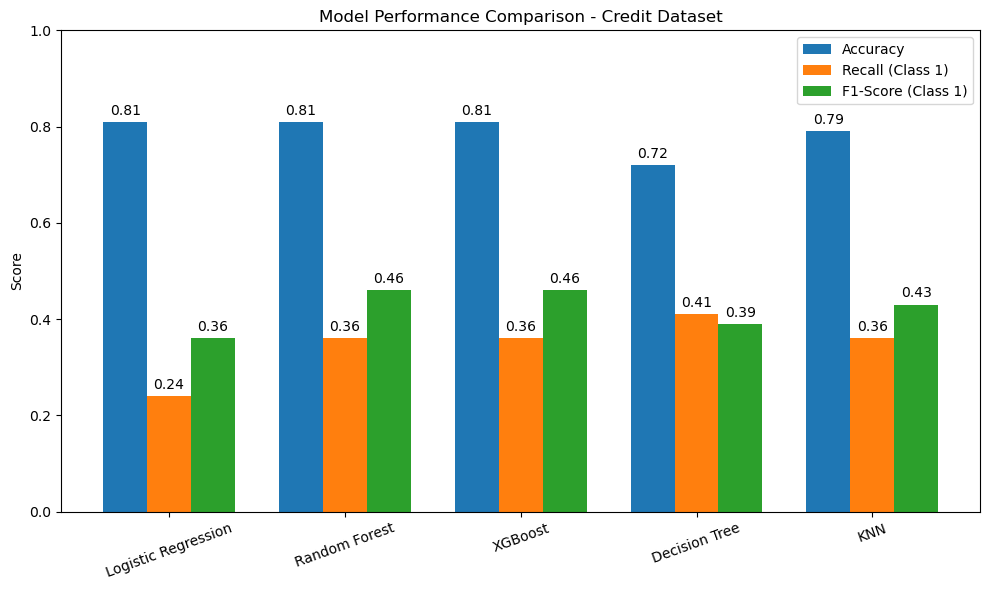

In [11]:
# Model names
models = ['Logistic Regression', 'Random Forest', 'XGBoost', 'Decision Tree', 'KNN']

# Updated metrics for class 1 (from classification reports)
accuracy = [0.81, 0.81, 0.81, 0.72, 0.79]
recall_1 = [0.24, 0.36, 0.36, 0.41, 0.36]
f1_1 = [0.36, 0.46, 0.46, 0.39, 0.43]

# Bar chart setup
x = np.arange(len(models))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x, recall_1, width, label='Recall (Class 1)')
rects3 = ax.bar(x + width, f1_1, width, label='F1-Score (Class 1)')

# Labels and title
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison - Credit Dataset')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=20)
ax.set_ylim([0, 1])
ax.legend()

# Add value labels on top of each bar
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)

plt.tight_layout()
plt.show()

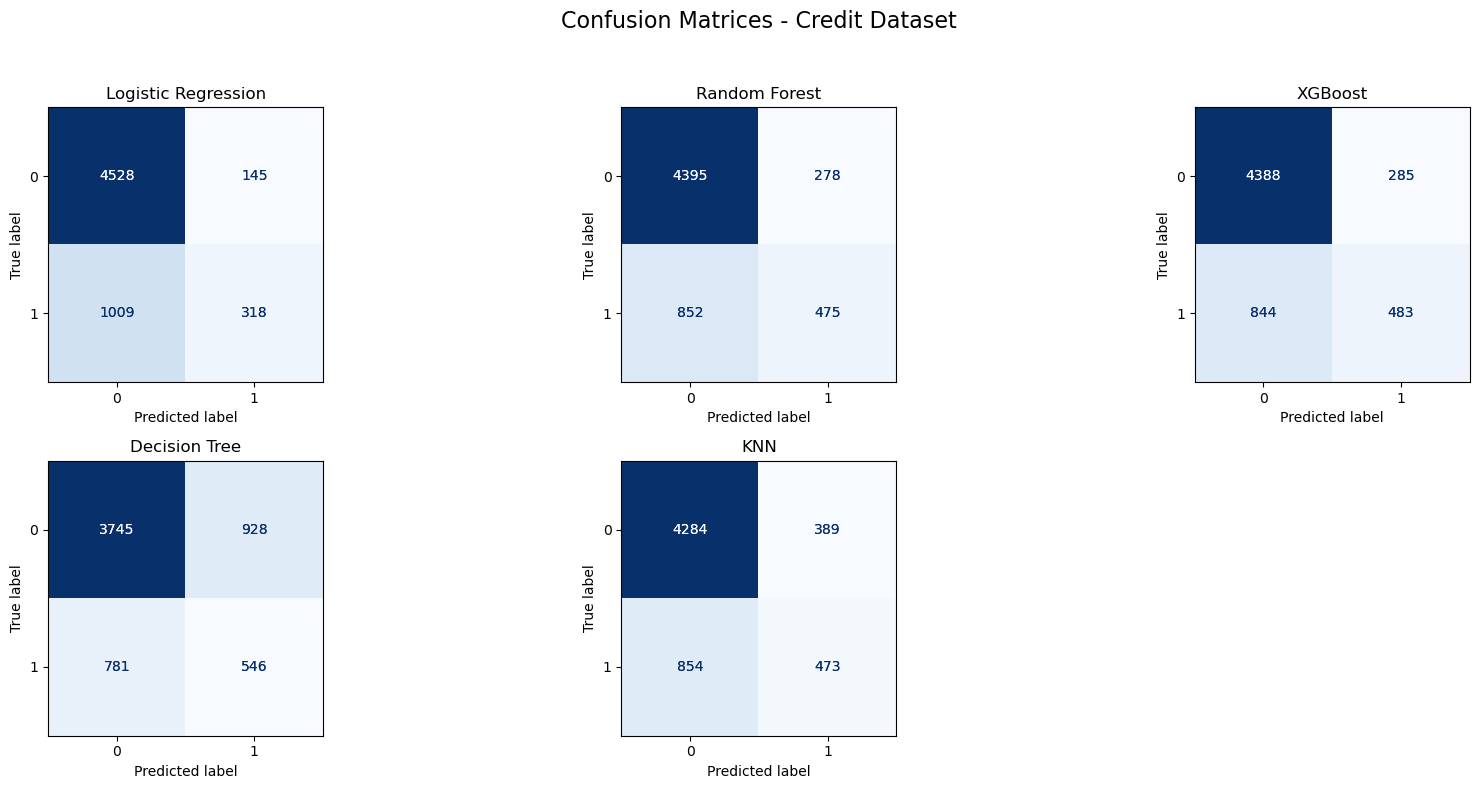

In [12]:
# Define predictions and model names
models_preds = {
    "Logistic Regression": y_pred_lr_credit,
    "Random Forest": y_pred_rf_credit,
    "XGBoost": y_pred_xgb_credit,
    "Decision Tree": y_pred_dt_credit,
    "KNN": y_pred_knn_credit
}

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes = axes.flatten()

# Plot confusion matrices
for i, (name, y_pred) in enumerate(models_preds.items()):
    cm = confusion_matrix(y_credit_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[i], cmap='Blues', colorbar=False)
    disp.plot(ax=axes[i], cmap='Blues', colorbar=False)
    axes[i].set_title(name)
    axes[i].set_xlabel("Predicted label")
    axes[i].set_ylabel("True label")


# Hide the last (empty) subplot if needed
if len(models_preds) < len(axes):
    fig.delaxes(axes[-1])

plt.suptitle("Confusion Matrices - Credit Dataset", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

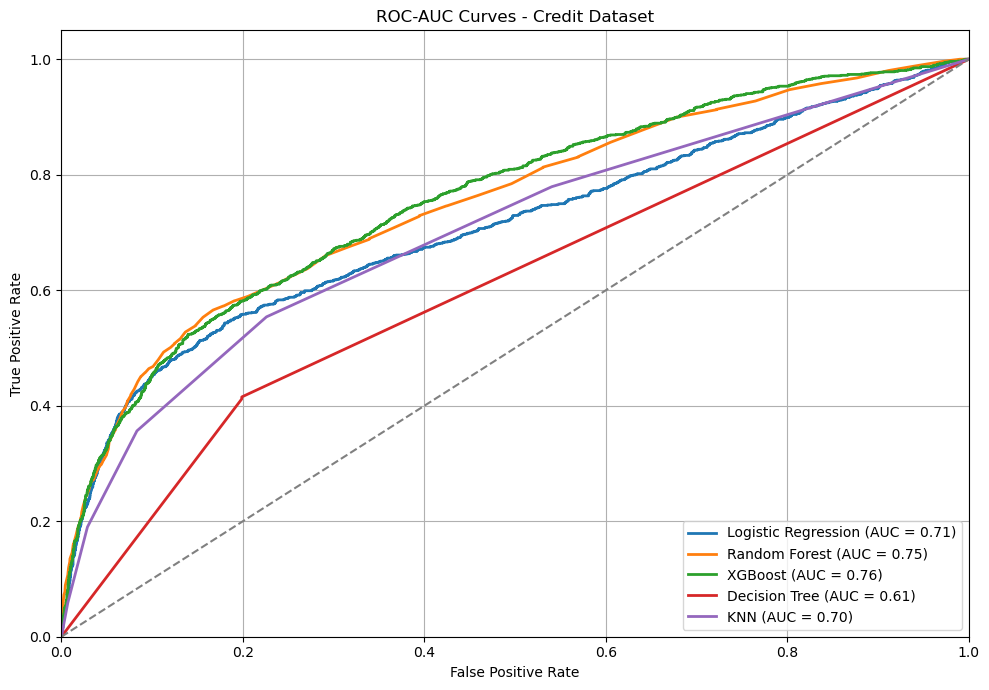

In [13]:
# True labels
y_true = y_credit_test

# Model probabilities dictionary
model_probs = {
    "Logistic Regression": y_prob_lr_credit,
    "Random Forest": y_prob_rf_credit,
    "XGBoost": y_prob_xgb_credit,
    "Decision Tree": y_prob_dt_credit,
    "KNN": y_prob_knn_credit
}

# Plot ROC curves
plt.figure(figsize=(10, 7))

for model_name, y_probs in model_probs.items():
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{model_name} (AUC = {roc_auc:.2f})")

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curves - Credit Dataset')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

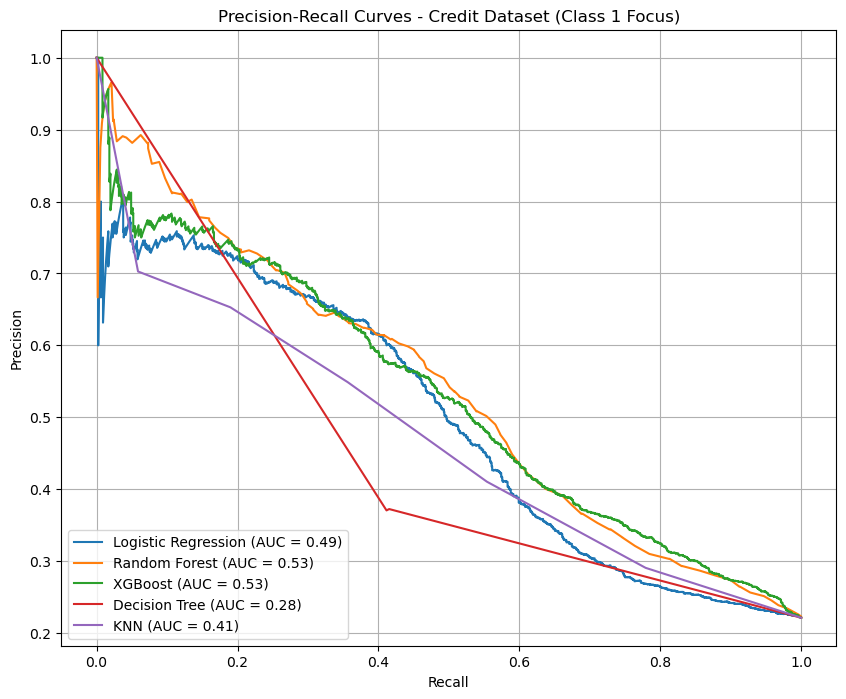

In [14]:
# Dictionary of model probabilities
probs = {
    "Logistic Regression": y_prob_lr_credit,
    "Random Forest": y_prob_rf_credit,
    "XGBoost": y_prob_xgb_credit,
    "Decision Tree": y_prob_dt_credit,
    "KNN": y_prob_knn_credit
}

plt.figure(figsize=(10, 8))

# Plot Precision-Recall curve for each model
for name, y_prob in probs.items():
    precision, recall, _ = precision_recall_curve(y_credit_test, y_prob)
    pr_auc = average_precision_score(y_credit_test, y_prob)
    plt.plot(recall, precision, label=f"{name} (AUC = {pr_auc:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves - Credit Dataset (Class 1 Focus)")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()